<a href="https://colab.research.google.com/github/mst-projects/numerai/blob/main/train_xgb_ranker_in_eraboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gc
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Read training data

In [ ]:
training_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_training_data.csv.xz")
training_data

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n000315175b67977,era1,train,0.00,0.50,0.25,0.00,0.50,0.25,0.25,0.25,0.75,0.75,0.25,0.25,1.00,0.75,0.50,1.00,0.50,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.25,0.00,0.50,0.25,0.75,0.50,1.00,0.75,0.75,0.50,0.50,0.75,0.50,...,0.75,0.75,0.75,0.50,1.00,1.00,0.50,0.75,0.50,0.25,0.25,0.75,0.50,1.00,0.50,0.75,0.75,0.25,0.50,1.00,0.75,0.50,0.50,1.00,0.25,0.50,0.50,0.50,0.75,1.00,1.00,1.00,0.75,0.50,0.75,0.50,1.00,0.50,0.75,0.50
1,n0014af834a96cdd,era1,train,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.25,0.50,0.50,0.00,0.50,0.00,0.50,0.50,0.50,0.50,0.50,0.25,0.25,0.50,0.00,1.00,0.50,0.50,0.50,0.75,0.50,0.50,0.75,0.25,0.50,0.75,0.50,0.25,0.75,0.50,...,0.25,0.25,0.25,1.00,1.00,0.50,0.50,0.50,0.00,0.25,1.00,0.50,1.00,1.00,0.50,0.50,0.50,1.00,0.25,0.75,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.75,0.25,0.00,0.25,1.00,0.25
2,n001c93979ac41d4,era1,train,0.25,0.50,0.25,0.25,1.00,0.75,0.75,0.25,0.00,0.25,0.50,1.00,0.50,0.75,0.50,0.50,1.00,0.50,0.50,0.50,0.25,0.00,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,0.50,0.75,0.25,0.50,0.50,0.75,0.50,...,0.25,1.00,1.00,1.00,0.50,1.00,1.00,1.00,0.50,1.00,0.00,1.00,1.00,0.50,1.00,0.75,1.00,0.00,0.50,0.75,0.00,1.00,0.50,0.50,0.75,1.00,0.75,1.00,0.25,0.50,0.25,0.50,0.00,0.00,0.50,1.00,0.00,0.25,0.75,0.25
3,n0034e4143f22a13,era1,train,1.00,0.00,0.00,0.50,0.50,0.25,0.25,0.75,0.25,0.50,0.50,0.50,0.75,0.50,1.00,0.50,0.50,0.00,1.00,0.00,0.75,0.00,0.50,0.50,0.50,0.50,0.00,0.50,0.50,0.75,0.75,0.50,0.25,0.50,0.50,0.50,0.50,...,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,1.00,0.75,1.00,0.75,1.00,0.75,1.00,0.00,0.50,0.75,1.00,0.75,1.00,0.75,1.00,1.00,0.00,0.50,0.75,0.75,1.00,0.75,1.00,1.00,0.75,0.75,1.00,1.00,0.75,1.00,1.00,0.25
4,n00679d1a636062f,era1,train,0.25,0.25,0.25,0.25,0.00,0.25,0.50,0.25,0.25,0.50,0.25,0.25,0.75,0.50,0.00,0.50,0.50,0.25,0.00,0.50,0.00,0.50,0.25,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,0.50,0.25,0.50,0.50,0.50,0.50,...,1.00,0.25,0.75,1.00,0.75,0.00,0.00,0.75,0.50,1.00,0.50,0.75,0.25,0.50,0.00,0.50,0.50,0.50,0.75,0.75,0.50,0.75,0.25,0.75,0.50,0.50,0.25,0.25,0.75,0.50,0.75,0.75,0.25,0.50,0.75,0.00,0.50,0.25,0.75,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501803,nff6a8a8feaeeb52,era120,train,0.50,0.50,0.25,0.00,0.00,0.50,0.75,0.00,0.75,0.75,0.25,0.00,1.00,0.00,0.75,0.00,0.50,1.00,0.25,0.25,0.00,0.50,0.75,0.

In [ ]:
feature_names = [f for f in training_data.columns if f.startswith("feature")]

In [ ]:
TOURNAMENT_NAME = ""
TARGET_NAME = f"target{TOURNAMENT_NAME}"
PREDICTION_NAME = f"prediction{TOURNAMENT_NAME}"
train_features = training_data[feature_names]
train_target = training_data[TARGET_NAME]

Defining necessary functions for valuation in training

In [ ]:
def ar1(x):
    return np.corrcoef(x[:-1], x[1:])[0,1]

def autocorr_penalty(x):
    n = len(x)
    p = ar1(x)
    return np.sqrt(1 + 2*np.sum([((n - i)/n)*p**i for i in range(1,n)]))

def smart_sharpe(x):
    return np.mean(x)/(np.std(x, ddof=1)*autocorr_penalty(x))

def spearmanr(target, pred):
    return np.corrcoef(
        target,
        pred.rank(pct=True, method="first")
    )[0, 1]

Select model type and train

---------------
iteration 0
worst eras:  ['era103', 'era68', 'era91', 'era104', 'era41', 'era66', 'era58', 'era107', 'era69', 'era85', 'era9', 'era27', 'era84', 'era60', 'era81', 'era74', 'era50', 'era113', 'era7', 'era31', 'era112', 'era106', 'era89', 'era82', 'era46', 'era101', 'era87', 'era40', 'era79', 'era54', 'era116', 'era65', 'era100', 'era67', 'era28', 'era73', 'era49', 'era21', 'era42', 'era80', 'era114', 'era18', 'era33', 'era32', 'era119', 'era70', 'era117', 'era56', 'era110', 'era26', 'era17', 'era57', 'era102', 'era3', 'era15', 'era71', 'era1', 'era37', 'era75', 'era78']

performance over time


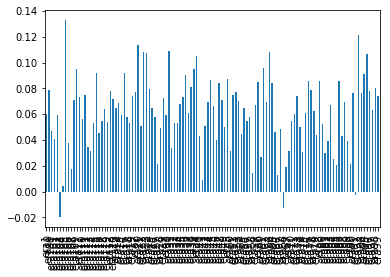


autocorrelation:  0.10962514673098521
mean correlation:  0.061237635209413964
sharpe:  2.2267271161202755
smart sharpe:  1.9881543492900642
---------------
iteration 1
worst eras:  ['era118', 'era83', 'era29', 'era34', 'era35', 'era14', 'era72', 'era94', 'era120', 'era97', 'era52', 'era6', 'era43', 'era8', 'era5', 'era53', 'era12', 'era45', 'era99', 'era4', 'era25', 'era86', 'era77', 'era109', 'era11', 'era90', 'era24', 'era9', 'era108', 'era64', 'era19', 'era51', 'era105', 'era47', 'era59', 'era98', 'era96', 'era61', 'era115', 'era63', 'era62', 'era81', 'era93', 'era48', 'era41', 'era16', 'era92', 'era36', 'era13', 'era55', 'era30', 'era103', 'era112', 'era66', 'era49', 'era67', 'era10', 'era23', 'era117', 'era91']

performance over time


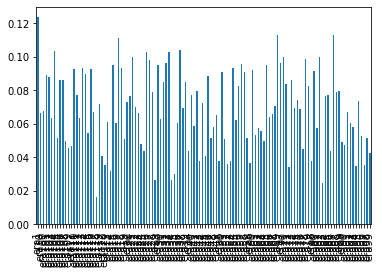


autocorrelation:  -0.03959572978608497
mean correlation:  0.06846499569175594
sharpe:  2.935335857134433
smart sharpe:  3.040201580328474
---------------
iteration 2
worst eras:  ['era68', 'era58', 'era69', 'era104', 'era107', 'era103', 'era50', 'era73', 'era91', 'era110', 'era85', 'era113', 'era101', 'era27', 'era106', 'era60', 'era9', 'era116', 'era46', 'era40', 'era119', 'era111', 'era32', 'era42', 'era102', 'era89', 'era82', 'era87', 'era18', 'era17', 'era59', 'era70', 'era112', 'era65', 'era33', 'era15', 'era84', 'era26', 'era54', 'era100', 'era31', 'era53', 'era21', 'era56', 'era41', 'era57', 'era2', 'era39', 'era7', 'era79', 'era38', 'era88', 'era1', 'era3', 'era114', 'era71', 'era62', 'era80', 'era75', 'era29']

performance over time


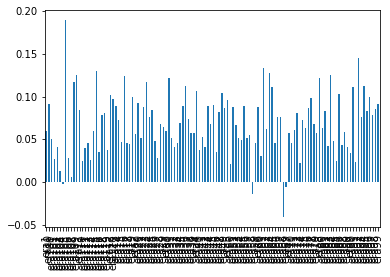


autocorrelation:  -0.05224946995722284
mean correlation:  0.0681586739631006
sharpe:  1.922981979683428
smart sharpe:  2.0168838105913105
---------------
iteration 3
worst eras:  ['era68', 'era74', 'era34', 'era28', 'era66', 'era118', 'era44', 'era58', 'era85', 'era107', 'era100', 'era22', 'era91', 'era37', 'era72', 'era97', 'era67', 'era103', 'era117', 'era113', 'era78', 'era35', 'era49', 'era84', 'era81', 'era119', 'era75', 'era14', 'era9', 'era98', 'era93', 'era104', 'era101', 'era99', 'era31', 'era11', 'era43', 'era18', 'era27', 'era41', 'era45', 'era42', 'era12', 'era24', 'era60', 'era112', 'era32', 'era69', 'era52', 'era40', 'era50', 'era76', 'era25', 'era71', 'era21', 'era3', 'era73', 'era54', 'era95', 'era82']

performance over time


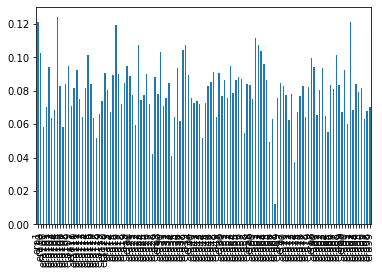


autocorrelation:  0.10410166439992706
mean correlation:  0.07945166861109455
sharpe:  4.526694624867896
smart sharpe:  4.064153536452943
---------------
iteration 4
worst eras:  ['era68', 'era65', 'era59', 'era46', 'era106', 'era89', 'era116', 'era79', 'era58', 'era56', 'era77', 'era110', 'era34', 'era57', 'era81', 'era9', 'era74', 'era102', 'era70', 'era91', 'era47', 'era28', 'era85', 'era114', 'era29', 'era53', 'era80', 'era111', 'era17', 'era120', 'era51', 'era107', 'era2', 'era87', 'era94', 'era4', 'era15', 'era118', 'era19', 'era96', 'era117', 'era7', 'era26', 'era90', 'era33', 'era109', 'era13', 'era11', 'era44', 'era55', 'era84', 'era42', 'era103', 'era86', 'era83', 'era27', 'era113', 'era41', 'era40', 'era48']

performance over time


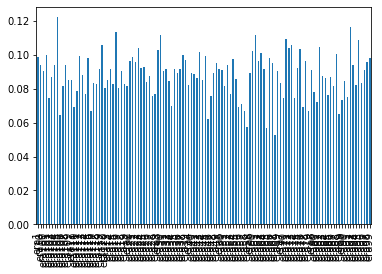


autocorrelation:  -0.007214133607713141
mean correlation:  0.0880188953359244
sharpe:  6.81914390097135
smart sharpe:  6.839426977398897
---------------
iteration 5
worst eras:  ['era68', 'era69', 'era66', 'era100', 'era119', 'era67', 'era73', 'era104', 'era32', 'era112', 'era103', 'era97', 'era43', 'era49', 'era21', 'era101', 'era58', 'era91', 'era37', 'era35', 'era54', 'era75', 'era6', 'era60', 'era31', 'era71', 'era85', 'era98', 'era50', 'era88', 'era34', 'era14', 'era22', 'era115', 'era46', 'era93', 'era3', 'era114', 'era108', 'era59', 'era78', 'era79', 'era18', 'era99', 'era25', 'era106', 'era36', 'era45', 'era62', 'era116', 'era12', 'era118', 'era52', 'era9', 'era28', 'era107', 'era41', 'era20', 'era113', 'era65']

performance over time


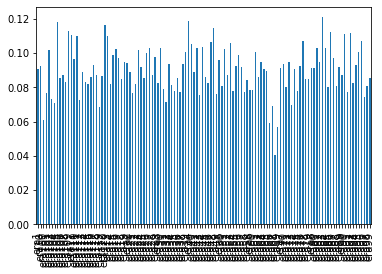


autocorrelation:  0.13615244858932174
mean correlation:  0.09002911823525693
sharpe:  6.557332067306816
smart sharpe:  5.70049965963169
---------------
iteration 6
worst eras:  ['era81', 'era68', 'era84', 'era74', 'era89', 'era57', 'era110', 'era1', 'era10', 'era117', 'era24', 'era19', 'era80', 'era8', 'era17', 'era29', 'era70', 'era56', 'era72', 'era64', 'era53', 'era2', 'era77', 'era7', 'era82', 'era76', 'era5', 'era11', 'era69', 'era100', 'era63', 'era15', 'era95', 'era35', 'era111', 'era27', 'era9', 'era102', 'era39', 'era67', 'era38', 'era34', 'era42', 'era119', 'era59', 'era46', 'era87', 'era40', 'era21', 'era51', 'era73', 'era91', 'era33', 'era65', 'era47', 'era112', 'era106', 'era90', 'era44', 'era23']

performance over time


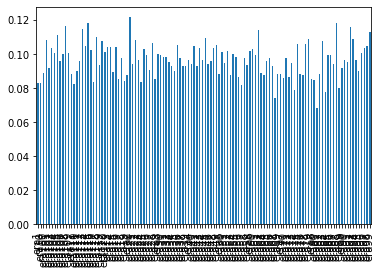


autocorrelation:  0.04987094390838145
mean correlation:  0.09680945545111479
sharpe:  9.873827951205659
smart sharpe:  9.35777867166355
---------------
iteration 7
worst eras:  ['era68', 'era66', 'era103', 'era41', 'era58', 'era55', 'era60', 'era107', 'era104', 'era71', 'era85', 'era49', 'era74', 'era31', 'era114', 'era37', 'era94', 'era26', 'era54', 'era86', 'era116', 'era43', 'era97', 'era100', 'era32', 'era67', 'era69', 'era118', 'era50', 'era75', 'era3', 'era6', 'era12', 'era14', 'era84', 'era91', 'era113', 'era28', 'era79', 'era101', 'era117', 'era98', 'era48', 'era61', 'era93', 'era25', 'era22', 'era78', 'era33', 'era7', 'era18', 'era96', 'era62', 'era70', 'era45', 'era80', 'era9', 'era36', 'era13', 'era16']

performance over time


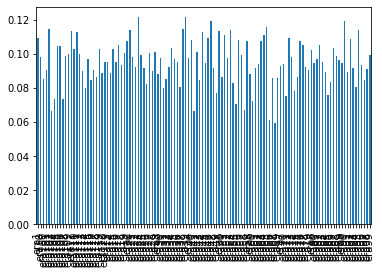


autocorrelation:  -0.01937971874270755
mean correlation:  0.09535119723174114
sharpe:  7.288356893038963
smart sharpe:  7.398776266186116
---------------
iteration 8
worst eras:  ['era81', 'era89', 'era4', 'era29', 'era57', 'era68', 'era59', 'era42', 'era107', 'era27', 'era58', 'era110', 'era52', 'era106', 'era120', 'era56', 'era34', 'era85', 'era35', 'era103', 'era119', 'era24', 'era53', 'era17', 'era41', 'era73', 'era30', 'era19', 'era77', 'era15', 'era10', 'era21', 'era112', 'era109', 'era111', 'era87', 'era46', 'era65', 'era40', 'era1', 'era83', 'era11', 'era8', 'era5', 'era54', 'era82', 'era50', 'era102', 'era99', 'era88', 'era32', 'era3', 'era91', 'era72', 'era60', 'era117', 'era37', 'era18', 'era116', 'era2']

performance over time


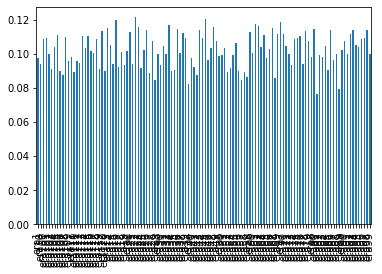


autocorrelation:  -0.06028478930771284
mean correlation:  0.10208475841567723
sharpe:  10.310471915556521
smart sharpe:  10.900732319252763
---------------
iteration 9
worst eras:  ['era66', 'era114', 'era74', 'era100', 'era118', 'era94', 'era71', 'era68', 'era115', 'era75', 'era79', 'era108', 'era28', 'era104', 'era63', 'era55', 'era103', 'era105', 'era67', 'era49', 'era31', 'era12', 'era9', 'era97', 'era84', 'era98', 'era41', 'era51', 'era113', 'era85', 'era43', 'era101', 'era34', 'era86', 'era19', 'era81', 'era35', 'era14', 'era107', 'era78', 'era6', 'era25', 'era58', 'era76', 'era95', 'era44', 'era73', 'era90', 'era36', 'era80', 'era21', 'era119', 'era26', 'era7', 'era96', 'era33', 'era47', 'era70', 'era112', 'era16']

performance over time


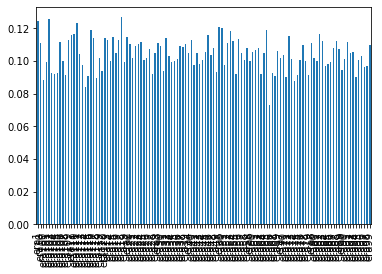


autocorrelation:  0.050752834068913226
mean correlation:  0.10441236142061563
sharpe:  10.972433693071661
smart sharpe:  10.389853535953804
---------------
iteration 10
worst eras:  ['era69', 'era91', 'era89', 'era57', 'era59', 'era65', 'era110', 'era106', 'era58', 'era103', 'era42', 'era107', 'era17', 'era68', 'era50', 'era53', 'era27', 'era40', 'era3', 'era104', 'era29', 'era56', 'era9', 'era62', 'era39', 'era111', 'era60', 'era54', 'era87', 'era93', 'era15', 'era116', 'era32', 'era46', 'era18', 'era81', 'era102', 'era117', 'era82', 'era113', 'era10', 'era38', 'era114', 'era64', 'era4', 'era52', 'era1', 'era77', 'era2', 'era88', 'era13', 'era85', 'era37', 'era11', 'era24', 'era45', 'era20', 'era30', 'era70', 'era101']

performance over time


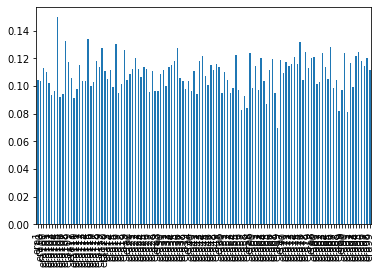


autocorrelation:  -0.04210839408838331
mean correlation:  0.10879104426434887
sharpe:  8.637766119712461
smart sharpe:  8.968709334552127
---------------
iteration 11
worst eras:  ['era66', 'era100', 'era75', 'era34', 'era41', 'era74', 'era94', 'era118', 'era28', 'era109', 'era99', 'era119', 'era79', 'era49', 'era22', 'era67', 'era7', 'era48', 'era71', 'era21', 'era72', 'era57', 'era31', 'era35', 'era61', 'era112', 'era8', 'era84', 'era23', 'era19', 'era98', 'era43', 'era68', 'era92', 'era14', 'era3', 'era12', 'era83', 'era97', 'era91', 'era33', 'era63', 'era51', 'era80', 'era55', 'era108', 'era86', 'era6', 'era115', 'era5', 'era26', 'era114', 'era59', 'era105', 'era120', 'era60', 'era95', 'era25', 'era44', 'era73']

performance over time


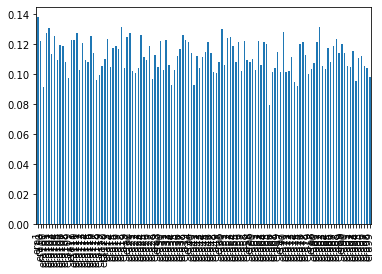


autocorrelation:  0.04600073916536288
mean correlation:  0.11213357470546609
sharpe:  10.573573860178678
smart sharpe:  10.059573862262816
---------------
iteration 12
worst eras:  ['era69', 'era58', 'era107', 'era103', 'era65', 'era106', 'era9', 'era68', 'era89', 'era110', 'era104', 'era50', 'era91', 'era40', 'era87', 'era116', 'era62', 'era17', 'era42', 'era111', 'era27', 'era53', 'era56', 'era113', 'era29', 'era54', 'era81', 'era85', 'era32', 'era39', 'era93', 'era82', 'era46', 'era117', 'era47', 'era41', 'era78', 'era21', 'era59', 'era70', 'era102', 'era57', 'era18', 'era15', 'era112', 'era101', 'era33', 'era37', 'era119', 'era96', 'era79', 'era1', 'era84', 'era52', 'era60', 'era2', 'era10', 'era100', 'era73', 'era88']

performance over time


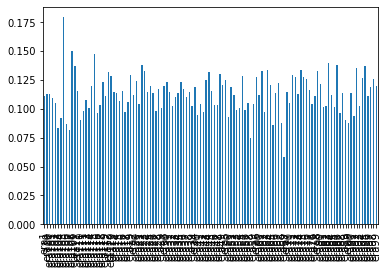


autocorrelation:  -0.018324955223026573
mean correlation:  0.11309327369933826
sharpe:  6.812421845921171
smart sharpe:  6.908398420392125
---------------
iteration 13
worst eras:  ['era34', 'era45', 'era66', 'era36', 'era4', 'era99', 'era28', 'era16', 'era90', 'era114', 'era77', 'era7', 'era3', 'era12', 'era35', 'era31', 'era11', 'era75', 'era97', 'era118', 'era94', 'era51', 'era9', 'era22', 'era67', 'era49', 'era98', 'era64', 'era25', 'era14', 'era72', 'era24', 'era117', 'era71', 'era43', 'era63', 'era26', 'era69', 'era65', 'era19', 'era8', 'era74', 'era30', 'era80', 'era29', 'era109', 'era6', 'era21', 'era103', 'era61', 'era48', 'era13', 'era92', 'era100', 'era76', 'era40', 'era58', 'era107', 'era56', 'era23']

performance over time


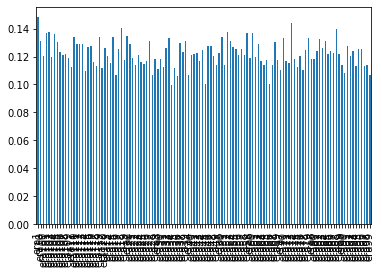


autocorrelation:  -0.02320724243902232
mean correlation:  0.12210954959727552
sharpe:  13.019662994925007
smart sharpe:  13.267196732960613
---------------
iteration 14
worst eras:  ['era68', 'era106', 'era69', 'era91', 'era87', 'era89', 'era81', 'era58', 'era104', 'era17', 'era42', 'era116', 'era41', 'era110', 'era70', 'era50', 'era85', 'era111', 'era27', 'era112', 'era107', 'era62', 'era60', 'era32', 'era103', 'era84', 'era9', 'era18', 'era46', 'era113', 'era34', 'era47', 'era59', 'era53', 'era57', 'era38', 'era73', 'era15', 'era119', 'era39', 'era55', 'era78', 'era82', 'era93', 'era40', 'era101', 'era33', 'era54', 'era102', 'era66', 'era7', 'era28', 'era44', 'era5', 'era86', 'era52', 'era95', 'era3', 'era29', 'era79']

performance over time


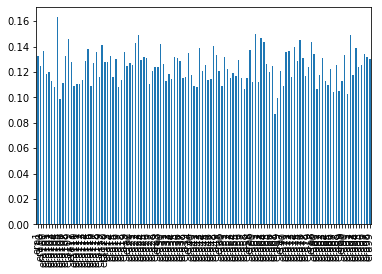


autocorrelation:  -0.007397388799005109
mean correlation:  0.12389857156428746
sharpe:  9.676776397747574
smart sharpe:  9.707323333463398
---------------
iteration 15
worst eras:  ['era108', 'era45', 'era114', 'era11', 'era99', 'era96', 'era4', 'era35', 'era21', 'era16', 'era2', 'era105', 'era75', 'era67', 'era83', 'era117', 'era12', 'era10', 'era31', 'era36', 'era51', 'era115', 'era72', 'era41', 'era97', 'era98', 'era49', 'era56', 'era37', 'era25', 'era94', 'era20', 'era120', 'era24', 'era43', 'era14', 'era118', 'era77', 'era91', 'era90', 'era74', 'era71', 'era100', 'era19', 'era22', 'era63', 'era65', 'era87', 'era26', 'era85', 'era89', 'era48', 'era34', 'era81', 'era80', 'era42', 'era57', 'era88', 'era64', 'era8']

performance over time


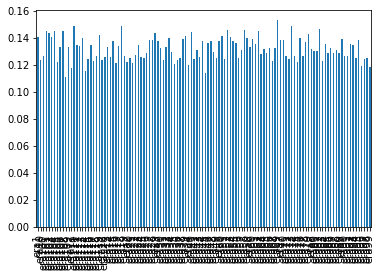


autocorrelation:  -0.0746054877366829
mean correlation:  0.13233538580588827
sharpe:  15.637422032510468
smart sharpe:  16.770180393780148
---------------
iteration 16
worst eras:  ['era68', 'era69', 'era58', 'era106', 'era103', 'era107', 'era60', 'era104', 'era116', 'era9', 'era50', 'era73', 'era70', 'era112', 'era17', 'era62', 'era111', 'era27', 'era110', 'era113', 'era91', 'era119', 'era84', 'era13', 'era46', 'era18', 'era32', 'era33', 'era59', 'era1', 'era40', 'era55', 'era78', 'era47', 'era93', 'era53', 'era21', 'era102', 'era82', 'era101', 'era66', 'era38', 'era7', 'era39', 'era15', 'era54', 'era87', 'era6', 'era52', 'era28', 'era79', 'era114', 'era29', 'era86', 'era41', 'era65', 'era89', 'era42', 'era67', 'era117']

performance over time


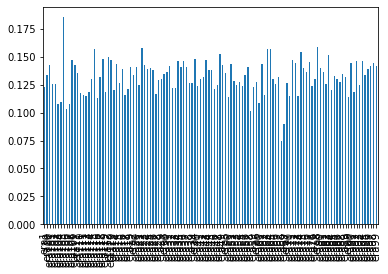


autocorrelation:  -0.00565570381827987
mean correlation:  0.13216268499342204
sharpe:  8.802631196193918
smart sharpe:  8.815179560258738
---------------
iteration 17
worst eras:  ['era3', 'era30', 'era95', 'era109', 'era108', 'era45', 'era44', 'era11', 'era4', 'era35', 'era5', 'era23', 'era99', 'era25', 'era16', 'era76', 'era96', 'era61', 'era51', 'era24', 'era85', 'era2', 'era68', 'era56', 'era94', 'era92', 'era81', 'era36', 'era12', 'era72', 'era75', 'era116', 'era19', 'era97', 'era100', 'era90', 'era37', 'era43', 'era49', 'era34', 'era57', 'era10', 'era31', 'era63', 'era20', 'era98', 'era80', 'era118', 'era22', 'era77', 'era26', 'era48', 'era71', 'era9', 'era88', 'era14', 'era17', 'era115', 'era83', 'era106']

performance over time


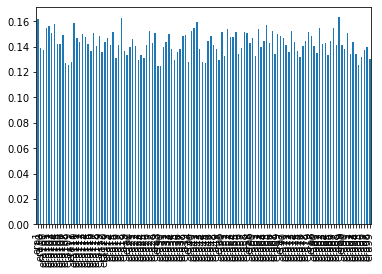


autocorrelation:  0.11863063434175522
mean correlation:  0.14260748788404368
sharpe:  15.851498220209667
smart sharpe:  14.025704979391882
---------------
iteration 18
worst eras:  ['era69', 'era68', 'era103', 'era58', 'era107', 'era60', 'era91', 'era104', 'era112', 'era111', 'era70', 'era73', 'era119', 'era59', 'era21', 'era113', 'era40', 'era50', 'era110', 'era62', 'era46', 'era27', 'era84', 'era13', 'era33', 'era65', 'era93', 'era102', 'era87', 'era32', 'era67', 'era82', 'era114', 'era106', 'era18', 'era28', 'era54', 'era101', 'era66', 'era53', 'era55', 'era7', 'era78', 'era15', 'era47', 'era117', 'era41', 'era74', 'era52', 'era79', 'era85', 'era116', 'era1', 'era29', 'era89', 'era6', 'era9', 'era3', 'era39', 'era42']

performance over time


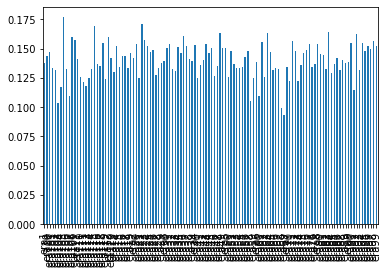


autocorrelation:  0.06215896382613996
mean correlation:  0.14024156394317253
sharpe:  9.463204694876582
smart sharpe:  8.859656812737171


In [ ]:
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
import xgboost as xgb

def era_boost_train(X, y, era_col, proportion=0.5, trees_per_step=10, num_iters=200):
    # Choose one from three models:
    # 1 GradientBoostingRegressor
    # model = GradientBoostingRegressor(max_depth=5, learning_rate=0.01, max_features="sqrt", subsample=0.5, n_estimators=trees_per_step, warm_start=(num_iters>1))
    # 2 XGB Ranker
    model= xgb.XGBRanker(
                  max_depth=5,
                  learning_rate=0.01,
                  n_estimators=trees_per_step,
                  #     early_stopping_rounds=20,
                  n_jobs=-1,
                  colsample_bytree=0.2)           
    # 3 XGB Regressor                    
    # model = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=trees_per_step, n_jobs=-1, colsample_bytree=0.1)
    features = X.columns
    cdf = training_data.groupby('era').agg(['count'])
    group = cdf[cdf.columns[0]].values
    del cdf
    # dtrain = xgb.DMatrix(training_data[feature_names], label=training_data['target'])
    model.fit(X, y, group=group)
    
    # model.fit(X, y)
    new_df = X.copy()
    new_df["target"] = y
    new_df["era"] = era_col
    
    for i in range(num_iters - 1):
        print("---------------")
        print(f"iteration {i}")
        
        # peridict on train and show score per each era
        preds = model.predict(X)
        new_df["pred"] = preds
        era_scores = pd.Series(index=new_df["era"].unique())
        
        for era in new_df["era"].unique():
            era_df = new_df[new_df["era"] == era]
            # print(era_df.columns)
            era_scores[era] = spearmanr(era_df["pred"], era_df["target"])
        
        era_scores.sort_values(inplace=True)
        worst_eras = era_scores[era_scores <= era_scores.quantile(proportion)].index
        print("worst eras: ", list(worst_eras))
        worst_df = new_df[new_df["era"].isin(worst_eras)]
        era_scores.sort_index(inplace=True)
        era_scores.plot(kind="bar")
        
        # show performance
        print("")
        print("performance over time")
        plt.show()
        print("")
        print("autocorrelation: ", ar1(era_scores))
        print("mean correlation: ", np.mean(era_scores))
        print("sharpe: ", np.mean(era_scores)/np.std(era_scores))
        print("smart sharpe: ", smart_sharpe(era_scores))

        model.n_estimators += trees_per_step
        booster = model.get_booster()
        
        # fitting on worst eras
        cdf = worst_df.groupby('era').agg(['count'])
        group = cdf[cdf.columns[0]].values
        del cdf
        # dtrain = xgb.DMatrix(training_data[feature_names], label=training_data['target_kazutsugi'])
        model.fit(worst_df[features], worst_df["target"], group=group, xgb_model=booster)
        # model.fit(worst_df[features], worst_df["target"])
    
    return model

boost_model = era_boost_train(train_features, train_target, era_col=training_data["era"], proportion=0.5, trees_per_step=10, num_iters=20)

In [ ]:
# if you choose simple XGB Ranker without eraboost, please run this column instead of above/
# xgbranker = xgb.XGBRanker(
#     max_depth=5,
#     learning_rate=0.05200136293873378,
#     n_estimators=2000,
# #     early_stopping_rounds=20,
#     n_jobs=-1,
#     colsample_bytree=0.17010869551014374              
#                         )

# cdf = training_data.groupby('era').agg(['count'])
# group = cdf[cdf.columns[0]].values
# del cdf
# # dtrain = xgb.DMatrix(training_data[feature_names], label=training_data['target_kazutsugi'])
# model = xgbranker.fit(train_features, train_target, group=group)

In [ ]:
# import pickle
# pickle.dump(boost_model, open("", "wb"))

In [ ]:
del training_data
gc.collect()

51916

Read tournament data

In [ ]:
tournament_data = pd.read_csv("https://numerai-public-datasets.s3-us-west-2.amazonaws.com/latest_numerai_tournament_data.csv.xz")
tournament_data

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,...,feature_wisdom8,feature_wisdom9,feature_wisdom10,feature_wisdom11,feature_wisdom12,feature_wisdom13,feature_wisdom14,feature_wisdom15,feature_wisdom16,feature_wisdom17,feature_wisdom18,feature_wisdom19,feature_wisdom20,feature_wisdom21,feature_wisdom22,feature_wisdom23,feature_wisdom24,feature_wisdom25,feature_wisdom26,feature_wisdom27,feature_wisdom28,feature_wisdom29,feature_wisdom30,feature_wisdom31,feature_wisdom32,feature_wisdom33,feature_wisdom34,feature_wisdom35,feature_wisdom36,feature_wisdom37,feature_wisdom38,feature_wisdom39,feature_wisdom40,feature_wisdom41,feature_wisdom42,feature_wisdom43,feature_wisdom44,feature_wisdom45,feature_wisdom46,target
0,n0003aa52cab36c2,era121,validation,0.25,0.75,0.50,0.50,0.00,0.75,0.50,0.25,0.50,0.50,0.25,0.00,0.25,0.50,0.25,0.00,0.25,1.00,1.00,0.25,1.00,1.00,0.25,0.25,0.00,0.50,0.25,0.75,0.00,0.50,0.25,0.25,0.25,0.50,0.00,0.50,1.00,...,0.00,0.00,0.25,0.50,0.25,0.25,0.00,0.25,0.00,0.25,0.50,0.50,0.50,0.50,0.00,0.25,0.75,0.25,0.25,0.50,0.25,0.00,0.25,0.50,0.25,0.50,0.25,0.25,1.00,0.75,0.75,0.75,1.00,0.75,0.50,0.50,1.0,0.00,0.00,0.25
1,n000920ed083903f,era121,validation,0.75,0.50,0.75,1.00,0.50,0.00,0.00,0.75,0.25,0.00,0.75,0.50,0.00,0.25,0.50,0.00,1.00,0.25,0.25,1.00,1.00,0.25,0.75,0.00,0.00,0.75,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.25,0.00,1.00,...,0.50,0.50,0.25,1.00,0.50,0.25,0.00,0.25,0.50,0.25,1.00,0.25,0.00,0.50,0.75,0.75,0.50,1.00,1.00,0.25,0.50,0.25,0.50,0.50,0.50,0.50,0.25,0.25,0.75,0.50,0.50,0.50,0.75,1.00,0.75,0.50,0.5,0.50,0.50,0.50
2,n0038e640522c4a6,era121,validation,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.50,0.50,1.00,1.00,1.00,0.75,0.50,0.50,1.00,1.00,0.50,0.50,0.00,1.00,0.50,1.00,0.50,1.00,0.50,1.00,0.25,1.00,1.00,1.00,0.50,1.00,1.00,0.75,1.00,...,0.25,0.50,0.00,0.00,0.00,0.25,0.25,0.00,0.50,0.00,0.00,0.00,0.25,0.00,0.25,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.75,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.50,0.25,0.00,0.00,0.5,0.50,0.00,1.00
3,n004ac94a87dc54b,era121,validation,0.75,1.00,1.00,0.50,0.00,0.00,0.00,0.50,0.75,1.00,0.75,0.00,0.50,0.00,0.50,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.25,0.75,1.00,0.50,0.50,0.75,0.50,1.00,0.50,0.25,0.75,0.25,0.75,0.25,0.75,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.75,0.00,0.00,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.0,0.25,0.25,0.50
4,n0052fe97ea0c05f,era121,validation,0.25,0.50,0.50,0.25,1.00,0.50,0.50,0.25,0.25,0.50,0.50,1.00,1.00,1.00,1.00,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.00,0.25,0.00,0.00,0.75,0.25,1.00,0.25,1.00,0.75,0.00,1.00,0.75,0.75,0.75,...,0.00,0.50,0.50,0.00,0.75,0.50,0.75,0.25,0.25,0.25,0.00,0.25,0.50,0.25,1.00,1.00,1.00,0.00,0.25,0.00,0.00,0.25,0.25,0.75,1.00,1.00,0.75,0.75,0.50,0.50,0.50,0.75,0.00,0.00,0.75,1.00,0.0,0.25,1.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886706,nffad5892c45c8b1,eraX,live,0.75,0.50,0.50,0.50,1.00,0.50,0.50,0.25,0.25,0.25,0.75,1.00,0.50,0.00,0.00,0.75,0.50,0.25

set validation data

In [ ]:
validation_data = tournament_data[tournament_data['data_type'] == 'validation']
validation_data['era']

0          era121
1          era121
2          era121
3          era121
4          era121
            ...  
1545360    era212
1545361    era212
1545362    era212
1545363    era212
1545364    era212
Name: era, Length: 137779, dtype: object

In [ ]:
del tournament_data
gc.collect()

641

In [ ]:
np.unique(validation_data['era'].values)

array(['era121', 'era122', 'era123', 'era124', 'era125', 'era126',
       'era127', 'era128', 'era129', 'era130', 'era131', 'era132',
       'era197', 'era198', 'era199', 'era200', 'era201', 'era202',
       'era203', 'era204', 'era205', 'era206', 'era207', 'era208',
       'era209', 'era210', 'era211', 'era212'], dtype=object)

Predict

In [ ]:
model = boost_model
predictions = model.predict(validation_data[feature_names])
validation_data[PREDICTION_NAME] = predictions

define functions for validation

In [ ]:
def ar1(x):
    return np.corrcoef(x[:-1], x[1:])[0,1]

def autocorr_penalty(x):
    n = len(x)
    p = ar1(x)
    return np.sqrt(1 + 2*np.sum([((n - i)/n)*p**i for i in range(1,n)]))

def sharpe(x):
    return np.mean(x)/np.std(x, ddof=1)

def smart_sharpe(x):
    return np.mean(x)/(np.std(x, ddof=1)*autocorr_penalty(x))

def numerai_sharpe(x):
    return ((np.mean(x) - 0.010415154) / np.std(x)) * np.sqrt(12)

def spearmanr(target, pred):
    return np.corrcoef(
        target,
        pred.rank(pct=True, method="first")
    )[0, 1]

def sortino_ratio(x, target=0.010415154):
   xt = x# - target
   return np.mean(xt) / (np.sum(np.minimum(0, xt)**2)/(len(xt)-1))**.5

def score(df):
    # method="first" breaks ties based on order in array
    pct_ranks = df[PREDICTION_NAME].rank(pct=True, method="first")
    targets = df[TARGET_NAME]
    return np.corrcoef(targets, pct_ranks)[0, 1]

validation

In [ ]:
validation_correlations = validation_data.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On validation the correlation has mean 0.02290884753437273 and std 0.022909680997520377


In [ ]:
print(validation_correlations)
validation_correlations.plot()

era
era121    0.037469
era122    0.020739
era123    0.039568
era124    0.052300
era125    0.046044
era126    0.028693
era127    0.016168
era128    0.049270
era129    0.001740
era130    0.046088
era131    0.032219
era132    0.062083
era197    0.028850
era198    0.015619
era199   -0.029697
era200    0.018691
era201    0.004919
era202    0.026370
era203    0.027541
era204    0.012889
era205    0.002085
era206    0.001377
era207    0.040177
era208    0.028672
era209    0.043237
era210   -0.009809
era211   -0.030232
era212    0.028378
dtype: float64

In [ ]:
print("sharpe: ", sharpe(validation_correlations))
print("smart sharpe: ", smart_sharpe(validation_correlations))
print("sortino_ratio: ", sortino_ratio(validation_correlations))

sharpe:  0.9999636196092063
smart sharpe:  0.8342879653469281
sortino_ratio:  2.736607553221841


Neutralization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def _neutralize(df, columns, by, proportion=1.0):
    scores = df[columns]
    exposures = df[by].values
    scores = scores - proportion * exposures.dot(np.linalg.pinv(exposures).dot(scores))
    return scores / scores.std()
def _normalize(df):
    X = (df.rank(method="first") - 0.5) / len(df)
    return scipy.stats.norm.ppf(X)
def normalize_and_neutralize(df, columns, by, proportion=1.0):
    # Convert the scores to a normal distribution
    df[columns] = _normalize(df[columns])
    df[columns] = _neutralize(df, columns, by, proportion)
    return df[columns]

In [ ]:
import scipy
validation_data["preds"] = predictions
validation_data["preds_neutralized"] = validation_data.groupby("era").apply(
    lambda x: normalize_and_neutralize(x, ["preds"], feature_names, 0.5) # neutralize by 50% within each era
)
scaler = MinMaxScaler()
validation_data["preds_neutralized"] = scaler.fit_transform(validation_data[["preds_neutralized"]]) # transform back to 0-1

In [ ]:
validation_data[PREDICTION_NAME] = validation_data['preds_neutralized']
validation_correlations = validation_data.groupby("era").apply(score)
print(f"On validation the correlation has mean {validation_correlations.mean()} and std {validation_correlations.std()}")

On validation the correlation has mean 0.02369156724058234 and std 0.019135479911992073


In [ ]:
print("sharpe: ", sharpe(validation_correlations))
print("smart sharpe: ", smart_sharpe(validation_correlations))
print("sortino_ratio: ", sortino_ratio(validation_correlations))

sharpe:  1.2380963189606233
smart sharpe:  1.061127783235635
sortino_ratio:  5.131936052235536
